In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/mycomputing002k/sample/main/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
print(corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst 

In [4]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [6]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55 42]
 [12 91]]


0.73

In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [10]:
analyzer = SentimentIntensityAnalyzer()

In [11]:
sentiments = [analyzer.polarity_scores(review)['compound'] for review in dataset['Review']]

In [12]:
dataset['Sentiments'] = sentiments

In [13]:
dataset.head()

,Review,Liked,Sentiments
0,Wow... Loved this place.,1,0.5994
1,Crust is not good.,0,-0.3412
2,Not tasty and the texture was just nasty.,0,-0.5574
3,Stopped by during the late May bank holiday of...,1,0.6908
4,The selection on the menu was great and so wer...,1,0.6249


In [15]:
pd.set_option('display.max_colwidth', None)
dataset[ (dataset['Sentiments'] < 0)].sort_values("Sentiments")[0:20]

,Review,Liked,Sentiments
289,"I hate to disagree with my fellow Yelpers, but my husband and I were so disappointed with this place.",0,-0.8637
44,"Frozen pucks of disgust, with some of the worst people behind the register.",0,-0.8402
492,"Worse of all, he humiliated his worker right in front of me..Bunch of horrible name callings.",0,-0.8402
379,"The staff are now not as friendly, the wait times for being served are horrible, no one even says hi for the first 10 minutes.",0,-0.8089
926,"It was so bad, I had lost the heart to finish it.",0,-0.7938
46,It's too bad the food is so damn generic.,0,-0.7900
967,Hell no will I go back,0,-0.7783
336,First - the bathrooms at this location were dirty- Seat covers were not replenished & just plain yucky!!!,0,-0.7633
495,And then tragedy struck.,0,-0.7506
121,"Worst service to boot, but that is the least of their worries.",0,-0.7391


In [17]:
pd.set_option('display.max_colwidth', None)
dataset[ (dataset['Sentiments'] > 0)].sort_values("Sentiments")[0:20]

,Review,Liked,Sentiments
765,Tasted like dirt.,0,0.0258
363,Definitely a turn off for me & i doubt I'll be back unless someone else is buying.,0,0.0516
81,walked in and the place smelled like an old grease trap and only 2 others there eating.,0,0.0516
525,"Similarly, the delivery man did not say a word of apology when our food was 45 minutes late.",0,0.0516
684,Damn good steak.,1,0.0516
823,The crêpe was delicate and thin and moist.,1,0.0516
275,"I've had better, not only from dedicated boba tea spots, but even from Jenni Pho.",0,0.0541
657,"That just SCREAMS ""LEGIT"" in my book...somethat's also pretty rare here in Vegas.",1,0.0688
965,It's NOT hard to make a decent hamburger.,0,0.0762
617,"Despite how hard I rate businesses, its actually rare for me to give a 1 star.",0,0.0762


In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [19]:
def wordcloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show() 

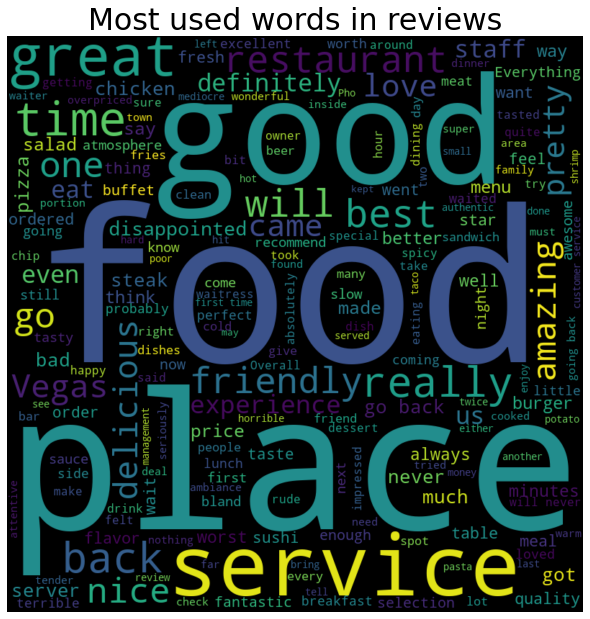

In [20]:
wordcloud_generator(dataset['Review'], title="Most used words in reviews")

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
feature = tfidf.fit_transform(dataset['Review'])

In [23]:
query = "food"
queryTFIDF = tfidf.transform([query])

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

cosims = cosine_similarity(queryTFIDF, feature).flatten()

In [25]:
results = cosims.argsort()[:-6:-1]

In [28]:
for r in results:
  print(dataset.iloc[r]['Review'])
  print(dataset.iloc[r]['Sentiments'])
  print("----")

The food is good.
0.4404
----
The food was very good.
0.4927
----
Great food.
0.6249
----
The food, amazing.
0.5859
----
Food was delicious!
0.6114
----
